# Making the plot

The training was based on 20 tasks of permuted MNIST. And there are 3000 samples for each task.

There are two ways to do the comparison. 

In [14]:
import torch

all_data = torch.load("gem_mnist_permutations.pt_2020_02_28_23_33_35_6fb6b138bdf34cbf9dd783499b4e3fa3.pt", 
           map_location = "cpu")

## The first is to compare two tasks directly. And there would be a dot product at each minibatch.

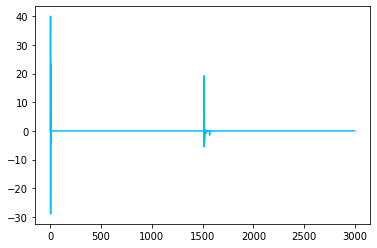

In [69]:
# indexes of two tasks to do the comparison(t_idx_1 < t_idx_2)
t_idx_1 = 3 
t_idx_2 = 20

dotp = []
batches = []
for i, item in enumerate(all_data[2][3000*(t_idx_2-1):3000*t_idx_2-1].tolist()):
    batches.append(i+1)
    dotp.append(item[t_idx_1-1])
    
plt.plot(batches, dotp, 'deepskyblue')

 ## The second one is to compare a certain task with all the following tasks. The average is taken of all 3000 samples to represent a certain task.

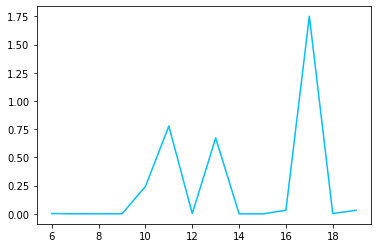

In [68]:
t_idx = 5 # index of the task to do the comparison

tasks = []
dotp = []
temp_sum = 0
task_num = t_show + 1

for i, item in enumerate(all_data[2][3000*(task_num-1):].tolist()):
    if i % 3000 == 0 and i > 0:
        tasks.append(task_num)
        dotp.append(temp_sum / 3000)
        temp_sum = 0
        task_num = i / 3000 + t_idx + 1
    
    temp_sum += item[t_idx-1]

plt.plot(tasks, dotp, 'deepskyblue')